<a href="https://colab.research.google.com/github/Iftekharul756/AI_lab_practice/blob/main/AI_Week_7_6095.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. MinMax
2. Alpha Beta
3. Chat Bot


# MinMax

In [1]:
import math

def minimax(curDepth, nodeIndex, maxTurn, scores, targetDepth):

  if curDepth == targetDepth:
    return scores[nodeIndex]

  if maxTurn:
    return max(
        minimax(curDepth + 1, nodeIndex * 2, False, scores, targetDepth),
        minimax(curDepth + 1, nodeIndex * 2 + 1, False, scores, targetDepth)
    )

  else:
    return min(
        minimax(curDepth + 1, nodeIndex * 2, True, scores, targetDepth),
        minimax(curDepth + 1, nodeIndex * 2 + 1, True, scores, targetDepth)
    )

scores = [3, 5, 2, 9, 12, 5, 23, 23]
treeDepth = int(math.log2(len(scores)))
print("The optimal value is : ", end = "")
print(minimax(0, 0, True, scores, treeDepth))


The optimal value is : 12


# AlphaBeta

 initially alpha = Min & Beta = Max


In [2]:
MAX, MIN = 1000, -1000

def minimax(depth, nodeIndex, maximizingPlayer, values, alpha, beta):

  if depth == 3:
    return values[nodeIndex]

  if maximizingPlayer:
    best = MIN

    for i in range(0, 2):
      val = minimax(depth + 1, nodeIndex * 2 + i, False, values, alpha, beta)
      best = max(best, val)
      alpha = max(alpha, best)

      if beta <= alpha:
        break

    return best

  else:
    best = MAX

    for i in range(0, 2):
      val = minimax(depth + 1, nodeIndex * 2 + i, True, values, alpha, beta)
      best = min(best, val)
      beta = min(beta, best)

      if beta <= alpha:
        break

    return best

if __name__ == "__main__":
  values = [3, 5, 6, 9, 1, 2, 0, -1]
  print("The optimal value is :", minimax(0, 0, True, values, MIN, MAX))

The optimal value is : 5


# ChatBot

In [3]:
!pip install transformers

from transformers import AutoModelForCausalLM, AutoTokenizer

model_name = "microsoft/DialoGPT-small"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

print("Chat with the bot ! Type exit to end the chat")
while True:
  user_input = input("You: ")
  if user_input.lower() == "exit":
    print("Chatbot: Goodbye!")
    break

  inputs = tokenizer.encode(user_input + tokenizer.eos_token, return_tensors="pt")
  outputs = model.generate(inputs, max_length=100, pad_token_id=tokenizer.eos_token_id)
  response = tokenizer.decode(outputs[:, inputs.shape[-1]:][0], skip_special_tokens=True)
  print("Bot:", response)

tokenizer_config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/641 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/351M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Chat with the bot ! Type exit to end the chat
You: How are you?


The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Bot: I'm here
You: Do you have any general knowledge?
Bot: I'm not sure what you mean.
You: what is your name?
Bot: I'm on right now


KeyboardInterrupt: Interrupted by user

Apply alpha beta pruning and find the best solution of the

In [4]:
import csv


MAX, MIN = 1000, -1000

def minimax(depth, nodeIndex, maximizingPlayer, values, alpha, beta):
    if depth == 3:
        return values[nodeIndex]

    if maximizingPlayer:
        best = MIN

        for i in range(2):
            val = minimax(depth + 1, nodeIndex * 2 + i, False, values, alpha, beta)
            best = max(best, val)
            alpha = max(alpha, best)

            if beta <= alpha:
                break

        return best

    else:
        best = MAX

        for i in range(2):
            val = minimax(depth + 1, nodeIndex * 2 + i, True, values, alpha, beta)
            best = min(best, val)
            beta = min(beta, best)

            if beta <= alpha:
                break

        return best

def read_priority_csv(filename):
    values = []
    with open(filename, newline='') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            for item in row:  # flatten
                values.append(int(item))
    return values

facilities = [
    "Tecno:Beauty",
    "Tecno:Food",
    "Tecno:Food:Loyalty Card",
    "Tecno:Chemi-Expo",
    "Entry Card",
    "Stall-Visit",
    "NO pass",
    "Penalty Card"
]



if __name__ == "__main__":

    values = [3, 5, 6, 9, 1, 2, 0, -1]

    print("Priority Pass Values:", values)

    best_value = minimax(0, 0, True, values, MIN, MAX)
    print("\nBest Value =", best_value)


    best_index = values.index(best_value)
    print("Best Facility =", facilities[best_index])


Priority Pass Values: [3, 5, 6, 9, 1, 2, 0, -1]

Best Value = 5
Best Facility = Tecno:Food


Best value from alpha-beta pruning: 5


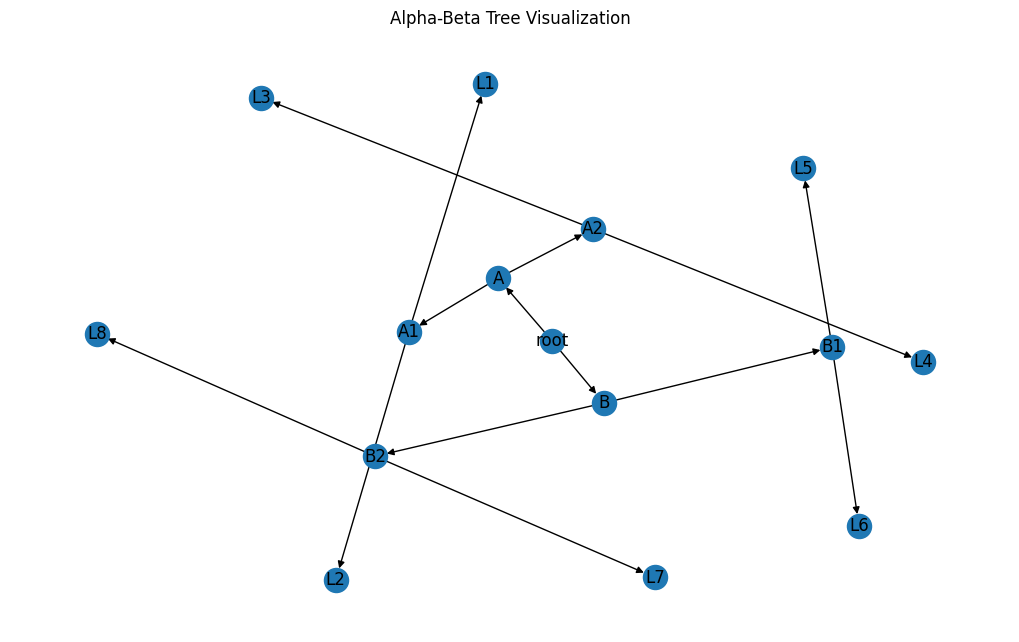

In [15]:
import csv
import matplotlib.pyplot as plt
import networkx as nx


priority = [3,5,6,9,1,2,0,-1]
facilities = [
    "tecno:beauty",
    "tecno:food",
    "tecno:food:loyality card",
    "Tecno:chemi-expo",
    "entrycard",
    "stall-visit",
    "no pass",
    "penalty card"
]

file_path = "priority_facilities.csv"
with open(file_path, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["priority", "facility"])
    for p, fac in zip(priority, facilities):
        writer.writerow([p, fac])



leaves = priority

tree = {
    "root": ["A", "B"],
    "A": ["A1", "A2"],
    "B": ["B1", "B2"],
    "A1": ["L1", "L2"],
    "A2": ["L3", "L4"],
    "B1": ["L5", "L6"],
    "B2": ["L7", "L8"]
}

leaf_values = {
    "L1": leaves[0],
    "L2": leaves[1],
    "L3": leaves[2],
    "L4": leaves[3],
    "L5": leaves[4],
    "L6": leaves[5],
    "L7": leaves[6],
    "L8": leaves[7],
}

def alphabeta(node, depth, alpha, beta, maximizing):
    if node in leaf_values:
        return leaf_values[node]

    best = float("-inf") if maximizing else float("inf")

    for child in tree[node]:
        val = alphabeta(child, depth+1, alpha, beta, not maximizing)
        if maximizing:
            best = max(best, val)
            alpha = max(alpha, best)
        else:
            best = min(best, val)
            beta = min(beta, best)
        if beta <= alpha:
            break
    return best

best_value = alphabeta("root", 0, float("-inf"), float("inf"), True)
print("Best value from alpha-beta pruning:", best_value)


G = nx.DiGraph()

for parent, children in tree.items():
    for c in children:
        G.add_edge(parent, c)

pos = nx.spring_layout(G)
plt.figure(figsize=(10,6))
nx.draw(G, pos, with_labels=True)
plt.title("Alpha-Beta Tree Visualization")
plt.savefig("alpha_beta_graph.png")
plt.show()



Best value from Alpha-Beta pruning = 5


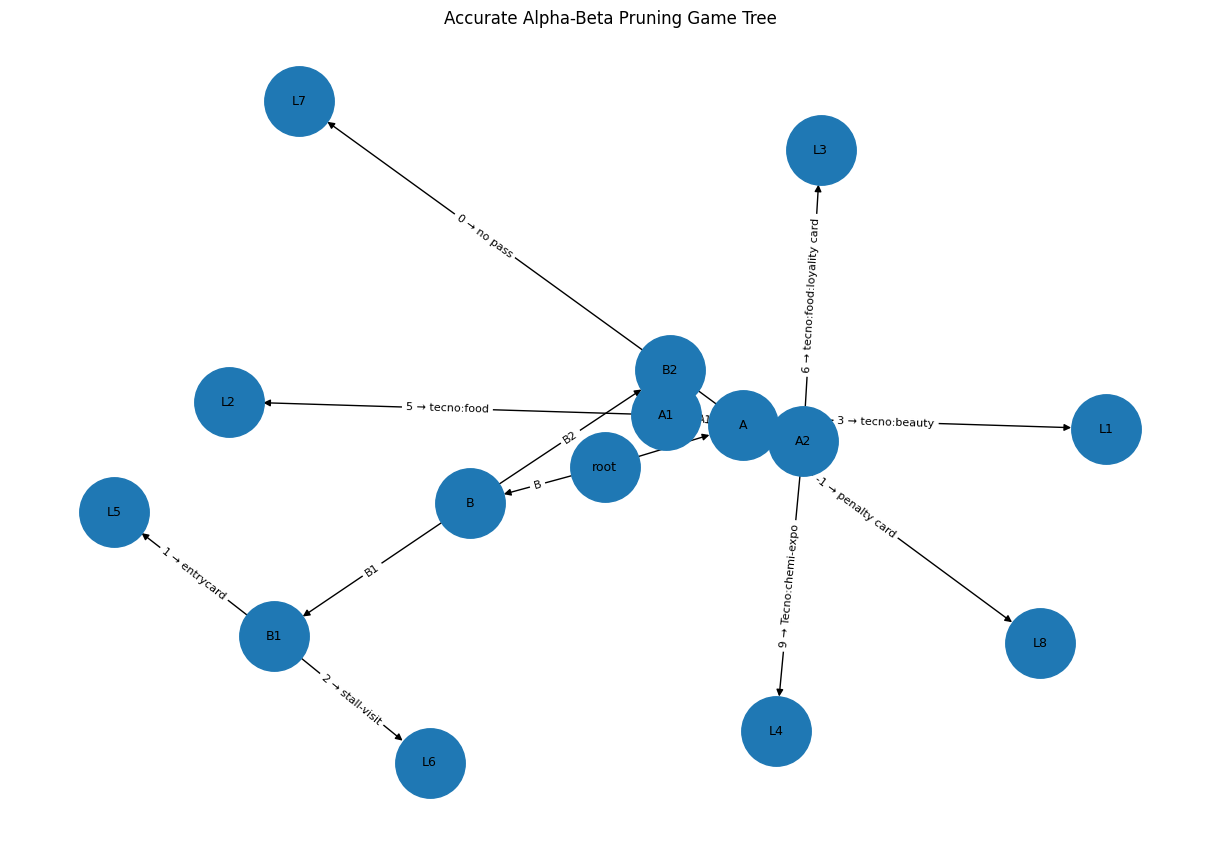

In [18]:
import csv
import matplotlib.pyplot as plt
import networkx as nx


priority = [3,5,6,9,1,2,0,-1]
facilities = [
    "tecno:beauty",
    "tecno:food",
    "tecno:food:loyality card",
    "Tecno:chemi-expo",
    "entrycard",
    "stall-visit",
    "no pass",
    "penalty card"
]

file_path = "priority_facilities.csv"
with open(file_path, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["priority", "facility"])
    for p, fac in zip(priority, facilities):
        writer.writerow([p, fac])


tree = {
    "root": ["A", "B"],
    "A": ["A1", "A2"],
    "B": ["B1", "B2"],
    "A1": ["L1", "L2"],
    "A2": ["L3", "L4"],
    "B1": ["L5", "L6"],
    "B2": ["L7", "L8"]
}


leaf_values = {
    "L1": priority[0],
    "L2": priority[1],
    "L3": priority[2],
    "L4": priority[3],
    "L5": priority[4],
    "L6": priority[5],
    "L7": priority[6],
    "L8": priority[7],
}


facility_map = {
    f"L{i+1}": f"{priority[i]} → {facilities[i]}"
    for i in range(8)
}


def alphabeta(node, alpha, beta, maximizing):

    if node in leaf_values:
        return leaf_values[node]

    if maximizing:
        best = float("-inf")
        for child in tree[node]:
            value = alphabeta(child, alpha, beta, False)
            best = max(best, value)
            alpha = max(alpha, best)
            if beta <= alpha:
                break
        return best


    else:
        best = float("inf")
        for child in tree[node]:
            value = alphabeta(child, alpha, beta, True)
            best = min(best, value)
            beta = min(beta, best)
            if beta <= alpha:
                break
        return best

best_value = alphabeta("root", float("-inf"), float("inf"), True)
print("\nBest value from Alpha-Beta pruning =", best_value)


G = nx.DiGraph()

for parent, children in tree.items():
    for child in children:
        if child in facility_map:
            label = facility_map[child]
        else:
            label = child
        G.add_edge(parent, child, label=label)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=5)

nx.draw(G, pos, with_labels=True, node_size=2500, font_size=9)

edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Accurate Alpha-Beta Pruning Game Tree")
plt.savefig("alpha_beta_graph.png")
plt.show()